# Visualização dos Dados CEASP
## Data Visualization and Storytelling

### Importando as bibliotecas utilizadas

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sw
import plotly.express as px

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
# Função para mostrar imagem
import urllib.request
from PIL import Image
import numpy as np

def mostra_img(url,senador):
    urllib.request.urlretrieve(url,f"img_{senador}.png")
    img = np.asarray(Image.open(f"img_{senador}.png"))
    plt.axis('off')
    plt.imshow(img)

def mostra_informações(df, partido):
    df_s = df.loc[df['Partido'] == partido]
    df_sen = df_s.groupby(['Senador'])['Reembolso'].sum().reset_index()
    df_sen.sort_values(by=['Reembolso'], ascending=False,inplace=True)
    aux = df.loc[df['Senador']==df_sen.iloc[0,0]]
    url = aux.iloc[0,15]
    senador = df_sen.iloc[0,0]
    print('Partido: '+partido)
    print('Senador(a): '+senador)
    print(f'Reembolso: {df_sen.iloc[0,1] / 1_000_000:.2f} milhões')
    part_per = df_s.groupby(['Partido'])['Reembolso'].sum()[0]
    part_per = (df_sen.iloc[0,1]/part_per)*100
    print(f'Porcentagem dos gastos do partido: {part_per:.2f}%')
    mostra_img(url, senador)

### Importando base de dados

In [159]:
df = pd.read_csv("Dados CEASP Tratados.csv")
df.head()

,Unnamed: 0,Ano,Mes,Senador,Tipo Desp.,CNPJ/CPF,Fornecedor,Documento,Data,Reembolso,Cod. Documento,Nome Completo,Sexo,Partido,UF,Url da Foto Parlamentar
0,0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-01-03,6000.0,2173614,Acir Marcos Gurgacz,Masculino,PDT,RO,http://www.senado.leg.br/senadores/img/fotos-o...
1,1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-01-04,1500.0,2173615,Acir Marcos Gurgacz,Masculino,PDT,RO,http://www.senado.leg.br/senadores/img/fotos-o...
2,2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,6000.0,2173616,Acir Marcos Gurgacz,Masculino,PDT,RO,http://www.senado.leg.br/senadores/img/fotos-o...
3,3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,2022-01-18,1000.0,2173618,Acir Marcos Gurgacz,Masculino,PDT,RO,http://www.senado.leg.br/senadores/img/fotos-o...
4,4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,2022-01-17,2000.0,2173617,Acir Marcos Gurgacz,Masculino,PDT,RO,http://www.senado.leg.br/senadores/img/fotos-o...


### Aplicando a Biblioteca Sweetviz no processo de EDA(Exploratory Data Analysis)

In [160]:
analyze_df = sw.analyze([df, "df"], target_feat='Reembolso')
analyze_df.show_html('analyze.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Com a análise exploratoria feita podemos partir para a criação da visualização

#### Mas antes será feito o agrupamento por Politico e Partido

In [161]:
df_agrupado = df.groupby(['Partido'])['Reembolso'].sum().reset_index()
df_agrupado.sort_values(by=['Reembolso'], ascending=False,inplace=True)
# df_agrupado = df_agrupado.rename(columns={'Reembolso': 'Soma de Reembolso'})
# df_final = pd.merge(df,df_agrupado, on=['Senador','Ano','Partido'])

df_agrupado.head()

,Partido,Reembolso
11,PSD,19347074.33
1,MDB,15391552.46
13,PT,10329749.91
7,PP,9400526.17
6,PODEMOS,8244181.14


#### Criando o Storytelling

##### Começaremos mostrando os gastos por Partido Politico

In [162]:
fig = px.bar(df_agrupado, x = 'Partido', y='Reembolso')
fig.show()

#### Utilizando dos 5 partidos com maiores gastos pegaremos quem foram os senadores que mais gastaram, em cada partido
#### E suas informações como Nome, foto, % de gastos do partido

In [163]:
# Seleciona os 5 partidos que mais tiveram Reembolso
partidos = list(df_agrupado['Partido'])[:5]

Partido: PSD
Senador(a): ELIZIANE GAMA
Reembolso: 1.70 milhões
Porcentagem dos gastos do partido: 8.78%


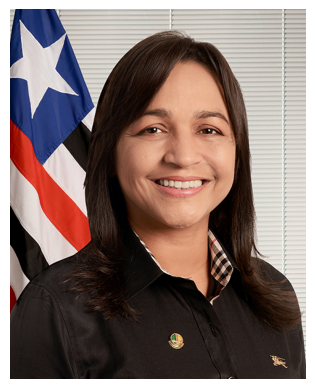

In [164]:
mostra_informações(df, partidos[0])

Partido: MDB
Senador(a): EDUARDO BRAGA
Reembolso: 1.68 milhões
Porcentagem dos gastos do partido: 10.94%


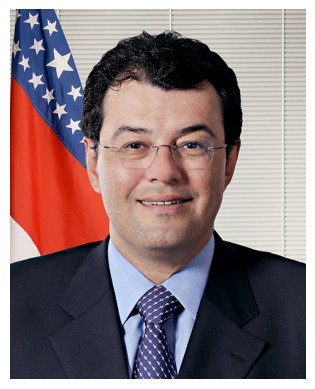

In [165]:
mostra_informações(df, partidos[1])

Partido: PT
Senador(a): ROGERIO CARVALHO
Reembolso: 1.93 milhões
Porcentagem dos gastos do partido: 18.67%


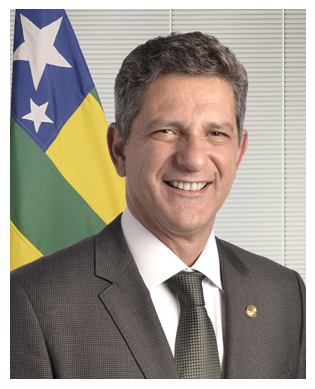

In [166]:
mostra_informações(df, partidos[2])

Partido: PP
Senador(a): MAILZA GOMES
Reembolso: 1.79 milhões
Porcentagem dos gastos do partido: 19.07%


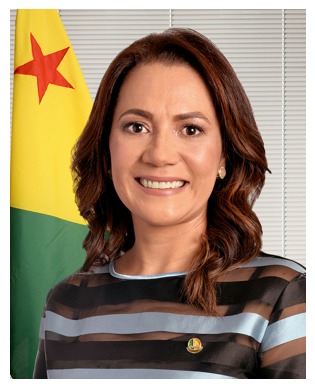

In [167]:
mostra_informações(df, partidos[3])

Partido: PODEMOS
Senador(a): ZEQUINHA MARINHO
Reembolso: 1.70 milhões
Porcentagem dos gastos do partido: 20.60%


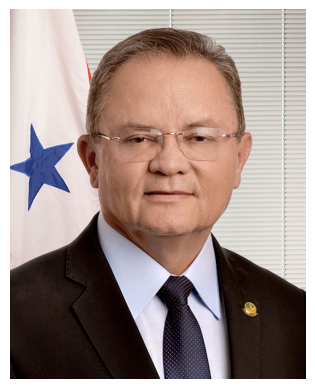

In [168]:
mostra_informações(df, partidos[4])